In [11]:
import pypianoroll
import os
import pretty_midi
import IPython.display
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
def load_batch(genre, batch_size):
    directory = os.getcwd() + '/Dataset/Genres/' + genre
    batch = []
    try:
        for file in os.listdir(directory):
            tensor = pypianoroll.load(directory + '/' + file)
            batch.append(tensor)
            print('loaded {} of {}'.format(len(batch), batch_size))
            if len(batch) >= batch_size:
                break
    except:
        print('No such genre')
        return
    return batch

loaded 1 of 4
loaded 2 of 4
loaded 3 of 4
loaded 4 of 4


/Users/liamboyd/opt/anaconda3/lib/python3.8/site-packages/pypianoroll/visualization.py:117: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  img = ax.imshow(


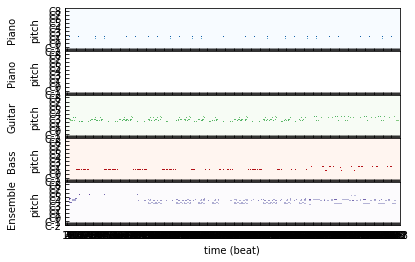

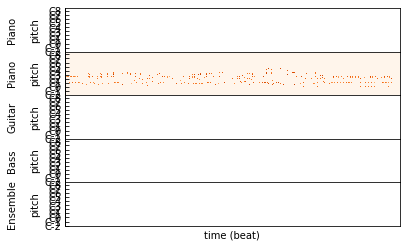

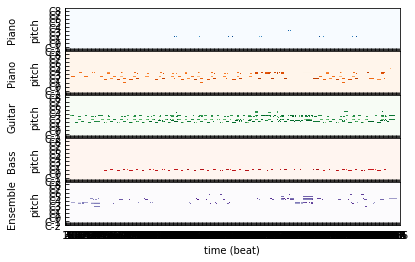

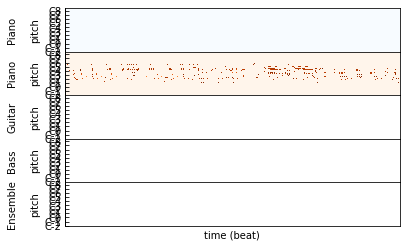

In [12]:
batch = load_batch('Jazz', 4)
for song in batch:
    song.plot(track_label="family", grid_axis="off")

In [10]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(30))

batch = load_batch('Jazz', 4)
for song in batch:
    print(song)
    pm_song = pypianoroll.to_pretty_midi(song)
    for track in pm_song:
        print(track)
        plt.figure(figsize=(8, 4))
        plot_piano_roll(track, 30, 90)

loaded 1 of 4
loaded 2 of 4
loaded 3 of 4
loaded 4 of 4
Multitrack(name='72782e1288ba8f014a145c074426404d', resolution=24, tempo=array(shape=(10848,), dtype=float64), downbeat=array(shape=(10848,), dtype=bool), tracks=[StandardTrack(name='Ze Pedro', program=30, is_drum=False, pianoroll=array(shape=(10848, 128), dtype=uint8)), StandardTrack(name='Cabeleira', program=29, is_drum=False, pianoroll=array(shape=(10848, 128), dtype=uint8)), StandardTrack(name='Tim - Baixo', program=34, is_drum=False, pianoroll=array(shape=(10848, 128), dtype=uint8)), StandardTrack(name='Drumkit', program=0, is_drum=True, pianoroll=array(shape=(10848, 128), dtype=uint8))])


TypeError: 'PrettyMIDI' object is not iterable